1. 서울시 각 구별 cctv 수를 파악하고 인구대비 cctv 비율을 구해서 순위 비교
2. 인구대비 cctv 평균치를 확인하고 cctv가 과하게 부족한 구를 확인
3. 고령자 대비 cctv 수 확인
4. 외국인 대비 cctv 수 확인

-필요한 데이터
-서울시 지자체별 cctv 현황 data
-서울시 지자체별 인구 현황 data

교재 23쪽

In [1]:
#데이터 분석을 위해서는 반드시 패키지를 import 해야 함
#pandas(데이터 분석). numpy(수치 분석) 패키지
#패키지는 관련 함수 모임
#import 패키지명 --패키지 명이 길 경우에는 별명을 생성해서 사용 할 수 있다.
#import 패키지명 as 별명


import pandas as pd
import numpy as np

In [2]:
#데이터 파일 읽어오기
#01. CCTV_in_seoul.csv (파일명은 다르면 안된다. 띄어쓰기 주의)
#한글 포함여부에 따라 옵션이 달라진다.
#한글 포함 시 encoding 방식을 지정해 줘야 함.
#utf-8 방식이 있고 : utf-8
#euc-kr 방식이 있음 :ansi 방식

#외부 파일 읽어올 때 경로가 중요(상대 경로 사용이 원칙)
#사용 DATA는 내문서\pythonBigData\data
#코드 파일은 내문서\pythonBigData\파이썬_1021\코드
#'../data/01. CCTV_in_Seoul.csv'

CCTV_seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv', encoding="utf-8")
#데이터 확인하기 위해서 위 5줄 출력

CCTV_seoul.head() #데이터프레임 형태로 출력



,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
#head() 힘수 : 데이터프레임의 데이터를 위에서부터 지정된 숫자 만큼 출력
CCTV_seoul.head()
CCTV_seoul.head(10)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [4]:
CCTV_seoul.tail() #마지막 5줄 출력(반환)
CCTV_seoul.tail(10) #마지막 10줄 출력

,기관명,소계,2013년도 이전,2014년,2015년,2016년
15,성동구,1062,730,91,241,265
16,성북구,1464,1009,78,360,204
17,송파구,618,529,21,68,463
18,양천구,2034,1843,142,30,467
19,영등포구,904,495,214,195,373
20,용산구,1624,1368,218,112,398
21,은평구,1873,1138,224,278,468
22,종로구,1002,464,314,211,630
23,중구,671,413,190,72,348
24,중랑구,660,509,121,177,109


In [5]:
#read_csv() 함수는 csv 파일을 읽어와서 데이터 프레임 형태로 저장
#데이터 프레임은 세로 데이터의 제목인 컬럼명이 있고
# 가로 데이터

#데이터 프레임의 컬럼명으로 컬럼을 접근하기 때문에 의미있는 컬럼명으로 사용
#컬럼명만 출력
CCTV_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [6]:
#컬럼명을 의미있게 변경
#rename 함수 사용 : df.rename(columns={바꿀위치 : 새로운이름값})
#기관명 -> 구별

CCTV_seoul.rename(columns={CCTV_seoul.columns[0]:'구별'})

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [7]:
CCTV_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [8]:
#rename 함수는 원본을 변경하지 않는다. 옵션 inplace = false로 되어있기 때문에

CCTV_seoul.rename(columns={CCTV_seoul.columns[0]:'구별'}, inplace = True)
CCTV_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


서울시 인구 현황 가져오기 - 엑셀 파일 읽기

In [9]:
pop_Seoul = pd.read_excel('../data/01.population_in_Seoul.xls', encoding="utf-8")

In [10]:
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [11]:
pop_Seoul = pd.read_excel('../data/01.population_in_Seoul.xls',
                                                              header=2, #두행 skip
                                                              usecols = 'B,D,G,J,N', #선택 열만 가져오기
                                                              encoding="utf-8"
                         )

In [12]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


컬럼명 변경 => 0:구별 1:인구수 2:한국인 3:외국인 4:고령자

In [13]:
pop_Seoul.rename(columns = {pop_Seoul.columns[0]:'구별',
                            pop_Seoul.columns[1]:'인구수',
                            pop_Seoul.columns[2]:'한국인',
                            pop_Seoul.columns[3]:'외국인',
                            pop_Seoul.columns[4]:'고령자'}, inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# CCTV 데이터 파악하기

설치대 대수가 작은 5개 구는 어디인가? -소계기 총 설치대수 이므로 소계를 기준으로 sort 한다.
정렬 함수 sort_values(by='기준열이름', ascending=True):오름차순 정렬

In [14]:
# CCTV 대수가 많은 5개 구는 어디인가?
# 소게를 기준으로 내림차순 정렬
CCTV_seoul.sort_values(by='소계', ascending = False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [15]:
#CCTV 최근 증가율 계산해서 '최근 증가율' 컬럼을 추가
#데이터프레임에 컬럼을 추가할 때는 df명['새로 추가될 컬럼명'] = 값들
CCTV_seoul['최근증가율'] = (CCTV_seoul['2014년'] + CCTV_seoul['2015년'] + CCTV_seoul['2016년']) / CCTV_seoul['2013년도 이전'] * 100

In [16]:
CCTV_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [17]:
#3개년간 CCTV 설치 증가율이 높은 5개 구를 출력
CCTV_seoul.sort_values(by="최근증가율", ascending = False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [18]:
# 서울시 인구 데이터 파악하기: 사용변수 pop_Seoul
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [19]:
# 첫 행 합계는 계산 행 이므로 삭제
# 삭제 함수 : del 명령어, drop() 함수
# 행 삭제 : drop() 함수
# 열 삭제 : del 명령어
# pop_Seoul.drop(0).head() #합계행(0행) 삭제
# pop_Seoul.head()#원본 반영 안 됨

In [20]:
pop_Seoul.drop(0, inplace=True) #합계행(0행) 삭제
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [21]:
# -각 구가 모두 데이터로 있는지 확인 작업
# 1. 구가 중복되어 있는지 (두번 이상 나타나면 안 됨)
# 전체 행 개수를 확인
# 중복 데이터를 제거한 후에 행 개수를 확인

In [22]:
#전체 행 개수 확인 : dataframe의 행 개수 확인 함수(len())
#서울시 구는 25개 구
len(pop_Seoul)

27

In [23]:
# 중복된 데이터는 제거하고 출력하는 함수(unique())
pop_Seoul['구별'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [24]:
# 구별 데이터에 nan 데이터가 들어있음 : nan = null -> 삭제 필요
# nan에 해당하는 행 전체를 삭제 : 구별값이 nan인 행의 인덱스 확인
# nan을 확인하는 함수 df명[필드명].isnull()
# 해당행을 출력해서 확인

pop_Seoul['구별'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

In [25]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [26]:
#데이터 프레임명[필드명 또는 조건식] : 데이터 행에 접근 

In [27]:
#pop_Seoul의 26행에 nan 값이 저장되어 있으므로 제거 후 제거되었는지 확인
# pop_Seoul.drop([26], inplace=True)
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [28]:
# 인구수 대비 외국인과 고령자 비율 계산
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100

In [29]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


1. 어느구의 인구가 가장 많은가? 인구가 많은 5개 구 출력
2. 외국인이 많은 5개 구 출력
3. 인구수 대비 외국인 많은 5개 구를 출력
4. 고령자가 많은 5개 구를 출력
5. 인구수 대비 고령자가 많은 5개 구를 출력

In [30]:
# 1. 어느구의 인구가 가장 많은가? 인구가 많은 5개 구 출력
pop_Seoul.sort_values(by="인구수", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883


In [31]:
# 2. 외국인이 많은 5개 구를 출력
pop_Seoul.sort_values(by="외국인", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [32]:
# 3. 인구수 대비 외국인 많은 5개 구를 출력
pop_Seoul.sort_values(by="외국인비율", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [33]:
# 4. 고령자가 많은 5개 구를 출력
pop_Seoul.sort_values(by="고령자", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883


In [34]:
# 5. 인구수 대비 고령자가 많은 5개 구를 출력
pop_Seoul.sort_values(by="고령자비율", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


cctv 데이터 가공필드 와 인구 데이터 가공필드 완성
인구대비 cctv 수의 적정성 확인을 위해
두 변수를 병합해서 분석해야 함.

In [35]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


In [36]:
CCTV_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [37]:
# CCTV_Seoul과 pop_Seoul 병합 코드
# 공통 컬럼인 '구별' 컬럼으로 조인
# 양쪽 모두 25개의 구로 이루어져 있음
#merge 함수
#pd.merge(조인할 df1, 조인할 df2, on = '공통필드')
data_result = pd.merge(CCTV_seoul, pop_Seoul, on = '구별')

In [38]:
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [39]:
# 사용하지 않을 컬럼을 삭제
# CCTV의 소계와 최근 증가율을 제외한 년도 관련 data는 삭제

In [40]:
# 열 삭제 -del 명령어는 원본 반영됨
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

In [41]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [42]:
# 그래프 그릴 때 축데이터를 쉽게 지정하기 위해서 행 인덱스를 구별로 변경
# 행 인덱스 지정 함수 : sel_index('지정열 이름', inplace=True)

data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [43]:
# 다수의 데이터 중 상관관계가 가장 큰 데이터를 비교
# 인구와 관련된 각 필드와 CCTV 소계와의 상고나 게수를 파악한 후 의미있는 그래프 표현

# 상관계수 : 두 변수의 관련성을 확인 하는 방법중의 하나
#     절대값이 클수록 두 데이터는 관련이 있다고 봄
#     절대값을 기준으로 0.1 이하 무시
#     0.3 이하 약한 상관 관계
#     0.7 이상 강한 상관 관계

# 상관관계 파악 변수(컬럼)
# CCTV 총대수와 인구수
# CCTV 총대수와 고령자 비율
# CCTV 총대수와 외국인 비율

# 계산 함수 numpy 패키지 corrcoef(데이터1, 데이터2)

In [44]:
# CCTV 총대수와 인구수 상관관계 확인
np.corrcoef(data_result['소계'], data_result['인구수'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [45]:
#CCTV 총 대수와 고령자 비율 상관관계 확인
np.corrcoef(data_result['소계'], data_result['고령자비율'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [46]:
#CCTV 총 대수와 외국인 비율 상관관계 확인
np.corrcoef(data_result['소계'], data_result['외국인비율'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [47]:
# cctv와 인구 현황 그래프 그리기

SyntaxError: invalid syntax (<ipython-input-47-7720cccbebc6>, line 1)

In [48]:
#파이썬의 그래프 그리는 모듈(패키지) : matploatib.pyplot
#서브패키지 pyplot 이용
import matplotlib.pyplot as plt

In [49]:
#그래프는 새창이 뜨면서 드로잉을 하는데
#새창 띄우지 말고 소스코드 안에서 드로잉 하라는 명령
%matplotlib inline

In [50]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [51]:
#사용 data
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


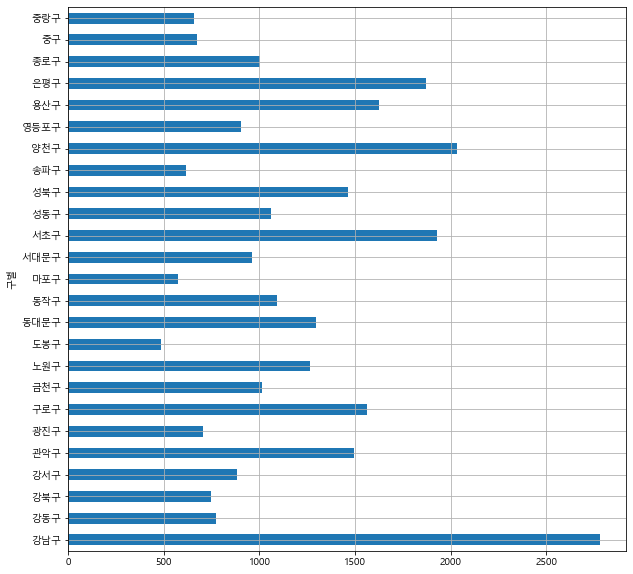

In [52]:
#구별 cctv 설치대수를 그래프로 표현
#수평 막대 그래프
#전체 그림 크기(그림영역 설정 plt.figure(figsize=(10, 10)))
plt.figure(figsize=(10, 10))
#그래프 그리기 plot(kind - 그래프 종류 값, grid - T/F(격자무늬설정))
data_result['소계'].plot(kind = 'barh', grid = True)
plt.show()

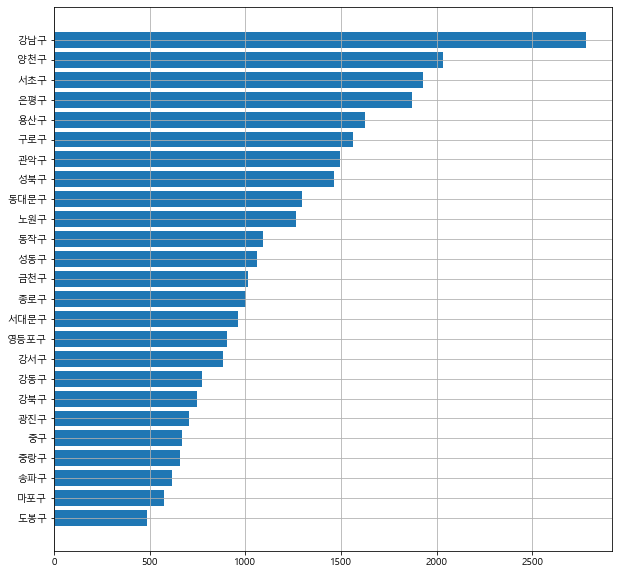

In [53]:
#구별 CCTV 설치대수 그래프
#수평막대 그래프 - 정렬해서 그래프 출력
s = data_result['소계'].sort_values()
s # 시리즈로 반환(1차원 배열) - 인덱스가 존재
plt.figure(figsize=(10, 10))
plt.barh(s.index, s)
plt.grid()
plt.show()


위 그래프는 각 구별 절대적인 cctv 대수를 이용해서 그린 그래프임 

절대수치로 가장 높은 구는 강남구, 양천구, 서초구 순으로 나타나고 있다.

절대수치로 cctv 설치대수가 낮은 구는 도봉구 마포구 송파구 순으로 나타나고 있다.

특이사항 : 강남권역에 속한 송파구가 cctv 절대수치가 낮게 표현됨

cctv 절대수와 인구수 간의 상관관계를 확인 했을 때 가장 상관이 높게 나타난 변수는 소계와 인구수 간의 관계였음.

인구수 대비 cctv가 많이 설치되어있는 지역을 찾아볼 것.

In [54]:
# 데이터 확인 : data_result = > cctv 데이터와 인구수 데이터를 병합해놓은 df
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [56]:
#인구수 대비 cctv 설치비율 변수 생성
#변수명 : cctv 비율

data_result['cctv비율'] = data_result['소계']/data_result['인구수'] * 100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673


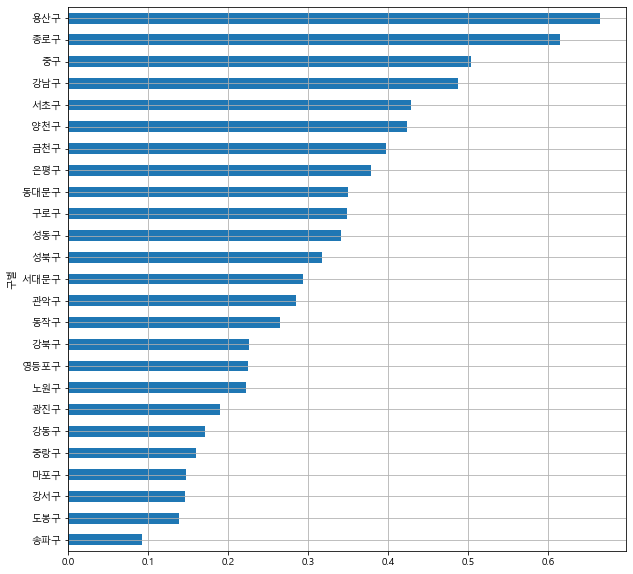

In [58]:
#cctv 비율이 높은 지역순으로 그래프를 작성
data_result['cctv비율'].sort_values().plot(kind="barh", grid=True, figsize=(10, 10))
plt.show()

인구수 대비 cctv 대수는 용산구와 종로구가 강남, 양천에 비해서 월등히 높다.

용산구와 종로구의 특징은 : 주거지역이 적고, 유동인구가 많은 대표적인 지역

주거지역보다 상업지역의 cctv 설치 빈도가 높다는 것을 알 수 있다.

In [59]:
# 인구수와 cctv 절대 설치대수를 이용해서 분산그래프를 그리기
# 분산그래프 함수는 : scatter() 사용
# 문법 : scatter(x축 data, y축 data, 마커크기 = n)

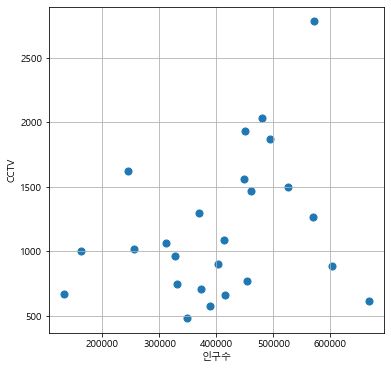

In [62]:
plt.figure(figsize = (6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
#x축 제목 : xlabel(제목값)
plt.xlabel("인구수")
#y축 제목 : ylabel(제목값)
plt.ylabel("CCTV")
plt.grid() #격자 표시
plt.show()

In [69]:
# - 데이터를(cctv 대수와 인구수)를 대표하는 직선을 하나 그려서 대표값 보다 높은 곳에 위치하는 수와 낮은 곳에 위치하는 표를 작업
# -인구수와 cctv 양의 상관관계를 갖는다. 1차 함수 방정식을 이용해서 직선을 그려봄

# -최소오차 직선식
# -polyfit(x, y, n) : y에 대한 x의 그래프에서 오차가 가장 적은 n차 방정식의 계수변환
# -cctv대수에 대한 인구수의 그래프를 그릴 때 필요한 1차 방정식의 계수를 

fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [68]:

#지수표현
#1. 30916415e-03 : 지수 표현 0.0000. => .000003 e - 5
#6, 45066497e+02 === 645.066497

# 인구가 10만일 때 적저ㄹ한 cctv 대수는 얼마인가?

# y = 0.00130946415 + 100000 + 645.066497

In [70]:
# 인구별 적절한 cctv 대수 값을 계산하기 위한 인구 데이터 생성
# 각 구별 인구수를 확인 했을 때 최소값과 최대값은 얼마인가?

data_result['인구수'] #최대 최소 확인 후 10만에서 70만 사이의 그래프를 그림


구별
강남구     570500.0
강동구     453233.0
강북구     330192.0
강서구     603772.0
관악구     525515.0
광진구     372164.0
구로구     447874.0
금천구     255082.0
노원구     569384.0
도봉구     348646.0
동대문구    369496.0
동작구     412520.0
마포구     389649.0
서대문구    327163.0
서초구     450310.0
성동구     311244.0
성북구     461260.0
송파구     667483.0
양천구     479978.0
영등포구    402985.0
용산구     244203.0
은평구     494388.0
종로구     162820.0
중구      133240.0
중랑구     414503.0
Name: 인구수, dtype: float64

In [73]:
#10만부터 70만 사이의 동리 간격 100개의 수를 생성
#linspace(최소값, 최대값, 발생할 수의 개수)

fx = np.linspace(100000, 700000, 100)
fx

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
       148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
       172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
       196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
       221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
       245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
       269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
       293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
       318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
       342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
       366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
       390909.09090909, 396969.6969697 , 403030.3030303 , 409090.90909091,
       415151.51515152, 4

In [74]:
#fp1 : 방정식 계수
#fx : 방정식에 사용할 x값
#방정식 함수를 생성 - poly1d(방정식 계수) y = 0.00130946415x + 645.066497

f1 = np.poly1d(fp1) #f1은 방정식을 수행할 수 있는 함수가 생성되어 있음
#f1은 함수로 생성됨 : f1(x값)으로 사용 y값이 나옴

In [76]:
f1(fx)

array([ 775.98291171,  783.9172399 ,  791.85156809,  799.78589628,
        807.72022447,  815.65455266,  823.58888085,  831.52320903,
        839.45753722,  847.39186541,  855.3261936 ,  863.26052179,
        871.19484998,  879.12917817,  887.06350636,  894.99783455,
        902.93216274,  910.86649093,  918.80081912,  926.73514731,
        934.6694755 ,  942.60380369,  950.53813187,  958.47246006,
        966.40678825,  974.34111644,  982.27544463,  990.20977282,
        998.14410101, 1006.0784292 , 1014.01275739, 1021.94708558,
       1029.88141377, 1037.81574196, 1045.75007015, 1053.68439834,
       1061.61872653, 1069.55305472, 1077.4873829 , 1085.42171109,
       1093.35603928, 1101.29036747, 1109.22469566, 1117.15902385,
       1125.09335204, 1133.02768023, 1140.96200842, 1148.89633661,
       1156.8306648 , 1164.76499299, 1172.69932118, 1180.63364937,
       1188.56797756, 1196.50230575, 1204.43663393, 1212.37096212,
       1220.30529031, 1228.2396185 , 1236.17394669, 1244.10827

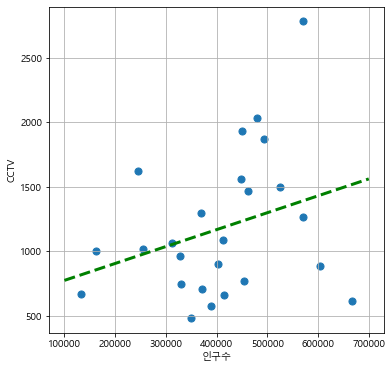

In [77]:
#인구수 대비 cctv 대수 분산그래프를 그리고 대표직선 그리기
#대표직선을 위한 data는 x값(인구수) : fx 변수 y값(cctv) : f1(fx)

plt.figure(figsize=(6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)

#대표직선 그래프 그리기
plt.plot(fx, f1(fx), ls='dashed', lw=3, color="g")
#ls : 선 스타일, lw : 선의 두께, color:선색상
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

- 위 그래프의 직선의 의미는 인구수가 400000일때 적정 cctv 대수는 1200대 정도여야 한다는 것을 표현

- 직선보다 위쪽은 일반보다 많은 지역

- 직선보다 아래쪽은 일반보다 적게 설치된 지역

# 조금 더 설득력 있는 자료 만들기
- 직선에서 멀어질수록 마커의 색상을 다르게 표현
- 직선과 멀리 있는 상위 10개 구를 선택해서 구 이름을 표시


In [78]:
# 각 구별 적절한 cctv 대수를 계산해 보자.
f1(data_result['인구수'])

array([1391.94464487, 1238.42289235, 1077.34202601, 1435.50315451,
       1333.05189553, 1132.29026377, 1231.40708166,  979.01070661,
       1390.48361768, 1101.50134126, 1128.79741381, 1185.12289226,
       1155.18099895, 1073.3765678 , 1234.59620553, 1052.53598367,
       1248.93155299, 1518.91131175, 1273.43648757, 1172.64001207,
        964.76830981, 1292.30154299,  858.22460369,  819.4995281 ,
       1187.71896477])

In [81]:
#구별 인구수 대비 cctv 오차 계산(있어야 할 대수보다 얼마나 많고 적은지를 계산)

data_result['소계'] - f1(data_result['인구수'])

#강남구등을 더 많이 설치
#강동구, 강북구, 강서구, 송파구 등은 부족한 상태

구별
강남구     1388.055355
강동구     -465.422892
강북구     -329.342026
강서구     -551.503155
관악구      162.948104
광진구     -425.290264
구로구      329.592918
금천구       35.989293
노원구     -125.483618
도봉구     -616.501341
동대문구     165.202586
동작구      -94.122892
마포구     -581.180999
서대문구    -111.376568
서초구      695.403794
성동구        9.464016
성북구      215.068447
송파구     -900.911312
양천구      760.563512
영등포구    -268.640012
용산구      659.231690
은평구      580.698457
종로구      143.775396
중구      -148.499528
중랑구     -527.718965
Name: 소계, dtype: float64

In [82]:
# 위에서 계산한 오차를 절대값으로 변환 후 상위 10개 구 확인
#abs(값) : 절대값을 반환
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


In [85]:
#오차가 큰 상위 10개 구만 추출 - 그래프에 구 이름을 표시하기 위해서
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head(10)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690
도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.139110,616.501341
마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110,0.147312,581.180999
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,0.378852,580.698457
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155


- 오차가 큰 상위 10개 도시에 구 이름 표시
- 그래프에 글자 출력하는 함수
- plt.text(x좌표, y좌표, 출력글자, fontsize)
- 마커보다 약간 오른쪽 아래에 출력되도록 좌표 변경 후 출력
- for n in range(10) : 
    plt.text(df_sort['인구수'][n] * 1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize = 15)

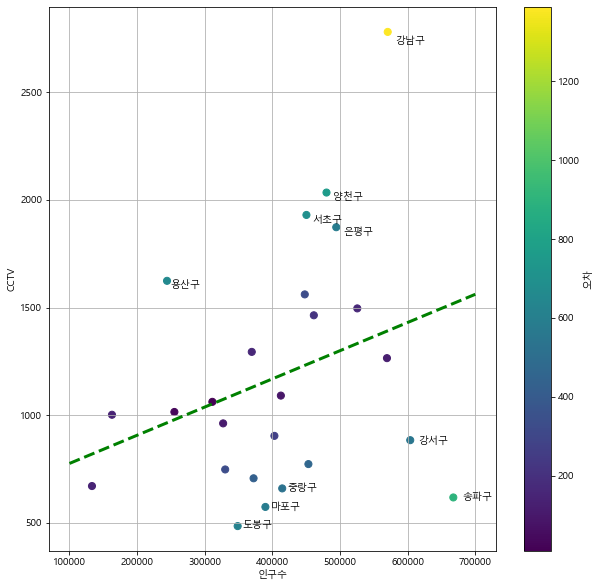

In [89]:
# 최종 그래프 그리기
plt.figure(figsize = (10, 10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50, c=data_result['오차'])
# 색상옵션 c 의 값을 데이터 값으로 주면 데이터 크기에 따라 색상이 다르게 표현된다.
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

#text 표현
for n in range(10):
    plt.text(df_sort['인구수'][n] * 1.02, df_sort['소계'][n] * 0.98, df_sort.index[n], fontsize = 10)

plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar(label='오차')
plt.grid()

plt.show()

In [90]:
#csv 파일로 데이터프레임 저장하기 : df변수명.to_csv(경로와 파일명, encoding='utf-8')
data_result.to_csv('./01_cctv_result.csv', encoding='utf-8')